### Multinomial Naive Bayes for Text Classification from scratch

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
import string

In [3]:
# A list of common english words which should not affect predictions
STOPWORDS=list(stopwords.words('english'))

In [4]:
X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element
for category in os.listdir(r'E:\Machine Learning\Teaching ML_Data Analysis\NLP\mini_newsgroups'):
    for document in os.listdir(r'E:\Machine Learning\Teaching ML_Data Analysis\NLP\mini_newsgroups'+ '\\' + category):
        with open(r'E:\Machine Learning\Teaching ML_Data Analysis\NLP\mini_newsgroups\\'+ category + '\\' + document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

#### Note: Smaller data_set is used to understand the concept and theory otherwise it may take too long to train the model. Being trained on smaller data set, accuracy is low for the developed model.
#### One can try full fledged data set available and accuracy will be much higher than this.
#### Data and its Description: https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

In [6]:
print(len(X_train))
print(len(Y_train))     
print(len(X_test))
print(len(Y_test))

1500
1500
500
500


In [44]:
X_test[0]

('50473',
 "Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!cs.utexas.edu!uunet!pipex!marble.uknet.ac.uk!uknet!acorn!camcon!aw\nFrom: aw@camcon.co.uk (Alain Waha)\nNewsgroups: comp.sys.mac.hardware\nSubject: Re: New Duo Dock info.\nMessage-ID: <30003@io.camcon.co.uk>\nDate: 6 Apr 93 08:55:26 GMT\nReferences: <nazario-040493023201@stiles-42-kstar-node.net.yale.edu> <1993Apr4.164142.14744@umiami.ir.miami.edu> <nazario-050493004102@stiles-42-kstar-node.net.yale.edu>\nOrganization: Cambridge Consultants Ltd., Cambridge, UK\nLines: 7\n\n>> In article <nazario-040493023201@stiles-42-kstar-node.net.yale.edu>, nazario@pop.cis.yale.edu (Edgardo Nazario) writes:\n>> > The info I am about to give is not a rumour, it's the truth. The new\n>> > macintosh coming in the second quarter, will have a cpu of their own. \n\nExcuse me but... have not all Macs got a CPU!!!\n\nAlain\n")

In [45]:
Y_test[0]

'comp.sys.mac.hardware'

In [10]:
# Building a vocabulary of words from the given documents
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation).lower()
        if (len(word_new)>2)  and (word_new not in STOPWORDS):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1

In [11]:
len(vocab.keys())

45610

### Frequency Calculation of words

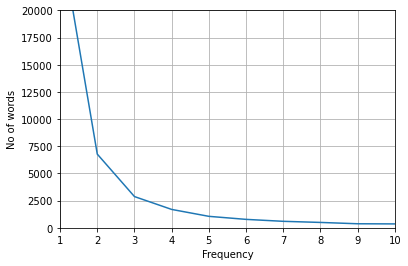

In [12]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)]
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [13]:
cutoff_freq = 80
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

Number of words with frequency higher than cutoff frequency(80) : 442


In [14]:
# Words with frequency higher than cutoff frequency are chosen as features
# (i.e we remove words with low frequencies as they would not be significant )
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [15]:
len(features)

442

### Vectorising the dataset

In [16]:
# To represent training data as word vector counts
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [17]:
X_train_dataset

array([[1., 1., 2., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [18]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    word_list = [ word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

### 1. Using sklearn's Multinomial Naive Bayes

In [19]:
############### Model Building #################
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
############### Prediction #####################
Y_test_pred = clf.predict(X_test_dataset)
############## Accuracy Calculation ############
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)

Sklearn's score on training data : 0.7426666666666667
Sklearn's score on testing data : 0.508


In [20]:
Y_test

['comp.sys.mac.hardware',
 'sci.crypt',
 'sci.crypt',
 'rec.autos',
 'talk.politics.mideast',
 'sci.crypt',
 'soc.religion.christian',
 'sci.med',
 'talk.politics.misc',
 'alt.atheism',
 'sci.electronics',
 'soc.religion.christian',
 'comp.os.ms-windows.misc',
 'comp.graphics',
 'rec.autos',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'talk.religion.misc',
 'soc.religion.christian',
 'sci.electronics',
 'talk.religion.misc',
 'sci.electronics',
 'rec.autos',
 'soc.religion.christian',
 'rec.sport.hockey',
 'sci.med',
 'comp.sys.mac.hardware',
 'sci.crypt',
 'comp.windows.x',
 'talk.religion.misc',
 'sci.electronics',
 'sci.crypt',
 'talk.religion.misc',
 'talk.politics.mideast',
 'rec.sport.hockey',
 'comp.sys.mac.hardware',
 'rec.sport.hockey',
 'comp.graphics',
 'comp.sys.mac.hardware',
 'rec.sport.baseball',
 'alt.atheism',
 'sci.med',
 'sci.electronics',
 'alt.atheism',
 'talk.politics.guns',
 'comp.windows.x',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'talk.p

In [21]:
Y_test_pred

array(['rec.autos', 'misc.forsale', 'sci.crypt', 'rec.autos',
       'talk.politics.guns', 'sci.crypt', 'soc.religion.christian',
       'rec.motorcycles', 'talk.politics.mideast', 'rec.sport.baseball',
       'rec.sport.hockey', 'rec.autos', 'misc.forsale', 'comp.graphics',
       'rec.autos', 'talk.politics.misc', 'comp.sys.mac.hardware',
       'alt.atheism', 'soc.religion.christian', 'misc.forsale',
       'talk.religion.misc', 'rec.autos', 'comp.sys.ibm.pc.hardware',
       'soc.religion.christian', 'rec.sport.hockey', 'sci.med',
       'sci.space', 'sci.crypt', 'rec.sport.baseball',
       'talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.crypt',
       'talk.religion.misc', 'sci.space', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.electronics', 'rec.sport.baseball',
       'alt.atheism', 'alt.atheism', 'comp.sys.ibm.pc.hardware',
       'comp.sys.mac.hardware', 'talk.politics.guns',
       'comp.os.ms-windows.m

In [22]:
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.44      0.55      0.49        31
           comp.graphics       0.50      0.29      0.36        21
 comp.os.ms-windows.misc       0.67      0.62      0.65        32
comp.sys.ibm.pc.hardware       0.39      0.55      0.45        22
   comp.sys.mac.hardware       0.48      0.46      0.47        26
          comp.windows.x       0.71      0.41      0.52        29
            misc.forsale       0.38      0.87      0.53        23
               rec.autos       0.36      0.52      0.43        25
         rec.motorcycles       0.33      0.80      0.47        20
      rec.sport.baseball       0.37      0.44      0.40        25
        rec.sport.hockey       0.54      0.70      0.61        20
               sci.crypt       0.95      0.64      0.77        28
         sci.electronics       0.50      0.16      0.24        25
                 sci.med       0.

### 2. Making  Our Own Function  From Scratch 

 #### We will use already prepared data >>  X_train_dataset,  Y_train

In [23]:
X_train_dataset

array([[1., 1., 2., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])


### Note the following points and go through the code, little tough:
* The function below returns a dictionary Named 'count', which contain 20 dictionary for each category.Each dictionary itself  is a dictionary containing count of each word (of feature) in a class, total word count in that class as key 'total' and total document in that class as key 'total_points'. Like

* count= {'sci.crypt': {0: 348.0, 1: 348.0,2: 811.0, 3: 776.0, 4: 116.0, ...,'total':109176.0,'total_points':767},'other category' :{...,..,...,.....}, '...' :{...,...,...,....},'total_points':14997}

* The last key of the 'count' dictionary ('total_points' )contain counting of all the documents in the x_train.

In [24]:
def fit(X_train,Y_train):
    count = {}
    # This can take some time to complete       
    classes = set(Y_train)
    for class_ in classes:
        count[class_] = {}
        for i in range(len(X_train[0])):
            count[class_][i] = 0
        count[class_]['total'] = 0
        count[class_]['total_points'] = 0
    count['total_points'] = len(X_train) ## Total number of documents
    
    for i in range(len(X_train)):
        for j in range(len(X_train[0])):
            count[Y_train[i]][j]+=X_train[i][j] ## count of each word of feature present in each class  
            count[Y_train[i]]['total']+=X_train[i][j] ## total word count in each  class
        count[Y_train[i]]['total_points']+=1 ## total doccument count in each class
    return count,classes

#### Calling the above function. This step is like training.
#### The result is used for calculating probability of any text lying in any partiular class in next fucntion.

In [25]:
count,classes=fit(X_train_dataset,Y_train) # It may take some time

In [26]:
## Visualize all these result below and revisit the code above again to understand it better
print(count.keys(),'\n')
print(count['sci.crypt'],'\n')
print(len(count['sci.crypt'].keys()),'\n')
print(count['sci.crypt']['total'],'\n')
print(count['sci.crypt']['total_points'],'\n')
count['total_points']

dict_keys(['talk.politics.misc', 'talk.politics.mideast', 'comp.sys.ibm.pc.hardware', 'comp.graphics', 'rec.sport.hockey', 'rec.motorcycles', 'sci.electronics', 'soc.religion.christian', 'sci.med', 'comp.windows.x', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'talk.politics.guns', 'talk.religion.misc', 'misc.forsale', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'sci.space', 'sci.crypt', 'total_points']) 

{0: 73.0, 1: 76.0, 2: 0.0, 3: 77.0, 4: 72.0, 5: 74.0, 6: 74.0, 7: 63.0, 8: 34.0, 9: 71.0, 10: 25.0, 11: 73.0, 12: 26.0, 13: 3.0, 14: 7.0, 15: 58.0, 16: 1.0, 17: 0.0, 18: 21.0, 19: 7.0, 20: 16.0, 21: 10.0, 22: 32.0, 23: 5.0, 24: 17.0, 25: 8.0, 26: 17.0, 27: 1.0, 28: 7.0, 29: 4.0, 30: 13.0, 31: 8.0, 32: 63.0, 33: 39.0, 34: 7.0, 35: 8.0, 36: 67.0, 37: 7.0, 38: 6.0, 39: 3.0, 40: 73.0, 41: 16.0, 42: 10.0, 43: 44.0, 44: 9.0, 45: 9.0, 46: 5.0, 47: 71.0, 48: 30.0, 49: 1.0, 50: 5.0, 51: 34.0, 52: 5.0, 53: 13.0, 54: 9.0, 55: 14.0, 56: 8.0, 57: 6.0, 58: 39.0, 59: 39.0, 60: 10.0, 61

1500

#### Note the points  to understand about the function below
* The formula from the slide is implemented inside this function.
* It takes text as vector and list of class as input 
* The count dictionary which is the result of function 'count_word_X' is used  for calculating probability of any text passed as a vector to lie in any particular class.

In [27]:
def probability(count,test_point,class_):
    log_prob = np.log(count[class_]['total_points']) - np.log(count['total_points'])
    total_words = len(test_point)
    for i in range(len(test_point)):
        current_word_prob = test_point[i]*(np.log(count[class_][i]+1)-np.log(count[class_]['total']+total_words))
        log_prob += current_word_prob
    return log_prob

In [28]:
def predictSinglePoint(count,classes,test_point):
    classes=list(classes)
    prob_list=[]
    for class_ in classes:
        log_probability_current_class = probability(count,test_point,class_)
        prob_list.append(log_probability_current_class)
                
    return classes[np.argmax(np.array(prob_list))]

In [29]:
def predict(count,classes,X_test):
    Y_pred = [] 
    for i in X_test:
        Y_pred.append(predictSinglePoint(count,classes,i))
        
    return Y_pred

In [30]:
 def score(Y_pred,Y_true):
        return np.mean(np.array(Y_pred)==np.array(Y_true))

In [31]:
Y_test_pred = predict(count,classes,X_test_dataset)
our_score_test = score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Our score on testing data : 0.508
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.44      0.55      0.49        31
           comp.graphics       0.50      0.29      0.36        21
 comp.os.ms-windows.misc       0.67      0.62      0.65        32
comp.sys.ibm.pc.hardware       0.39      0.55      0.45        22
   comp.sys.mac.hardware       0.48      0.46      0.47        26
          comp.windows.x       0.71      0.41      0.52        29
            misc.forsale       0.38      0.87      0.53        23
               rec.autos       0.36      0.52      0.43        25
         rec.motorcycles       0.33      0.80      0.47        20
      rec.sport.baseball       0.37      0.44      0.40        25
        rec.sport.hockey       0.54      0.70      0.61        20
               sci.crypt       0.95      0.64      0.77        28
         sci.electronics       0.50      0.16      0.24        25

In [32]:
print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.508
Score of inbuilt sklearn's MultinomialNB on the same data : 0.508


### Finally one thing remaining: How to classify  a text ,  given by user.
* For this, we have to vectorize the text that is given by user and after that we can use any predict function either from sklearn or from our own made function.
* Below is the function which vectorizes the text. 

In [33]:
def text_to_vec(text):
    text_pred=[('0',text)]
    # To convert  test data as word vector counts
    text_vec = np.zeros((len(text_pred),len(features)))
    for i in range(len(text_pred)):
        word_list = [ word.strip(string.punctuation).lower() for word in text_pred[i][1].split()]
        for word in word_list:
            if word in features:
                text_vec[i][features.index(word)] += 1
    return text_vec

In [34]:
#text_vec=text_to_vec("Cold blooded criminal don't hate killing with gun ")
text_vec=text_to_vec("I love watching movies full of romances ")

In [35]:
## Prediction by our own fucntion
text_pred = predict(count,classes,text_vec)
print('prediction by our own function : ', text_pred[0])
## Prediction by sklearn 
text_pred=clf.predict(text_vec)
print('prediction sklearn : ', text_pred[0])

prediction by our own function :  alt.atheism
prediction sklearn :  alt.atheism


### Making Confusion Matrix and It's Heat Map (for test data prediction)

In [38]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test, Y_test_pred)
mat

array([[17,  0,  0,  1,  1,  0,  0,  0,  6,  2,  0,  0,  0,  0,  0,  2,
         0,  2,  0,  0],
       [ 0,  6,  1,  1,  3,  1,  3,  2,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1],
       [ 1,  1, 20,  3,  0,  1,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0],
       [ 0,  0,  1, 12,  3,  0,  4,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  4, 12,  0,  3,  1,  1,  0,  0,  0,  3,  0,  1,  0,
         0,  0,  0,  0],
       [ 0,  3,  4,  1,  3, 12,  4,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 20,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  2, 13,  4,  1,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1, 16,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  3, 11,  8,  0,  0,  1,  0,  0,
         0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0

Text(91.67999999999999, 0.5, 'Predicted Labels')

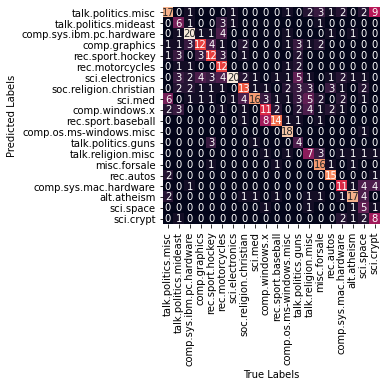

In [43]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=list(classes),yticklabels=list(classes))
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')